# Introduction: Cavity optomechanics

![image.png](Img/common_setups.png)

In the notebooks I try to explore different properties of cavity optomechanics by utilizing QuTiP. I explore QuTiP mainly by it master equation solver *mesolve()*, then taking the result I visualize the different properties (Utilizing data analysis):

- Expectation value
- Linear entropy
- Hilbert space truncation
- Fock distribution
- Wigner function
- Rabi oscillation

I try to make some of these properties interactable by using *matplotlib.animation*.

You will find 2 files of notebooks *Atom-Cavity* and *Cavity-Mirror*, that looks at these properties. 

*Idea for futher, wanted to write and read from a file for the result of mesolve().*

I note I got inspiration from these references: 

- Cavity with a moving mirror: https://nbviewer.org/github/jrjohansson/reproduced-papers/blob/master/Reproduce-PRA-56-4175-1997-Bose.ipynb
- Vacuum Rabi oscillations: https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/time-evolution/004_rabi-oscillations.ipynb

### Speedup
I tried speeding up the code but found it was not quite possible in the introduced ways, or i didnt have enough time to research it fully, of which:
- *@njit*, not possible bc. of QObjt of QuTiP couldnt handle it
- *nampa ne.evaulate()*, checked if implementation gave a speed e.g. Hamiltonian, did not find a difference (saw wrong values)

To see the difference I profilied the code by *line_profiler* and *%timeit*.

### Visualisation
I implemented interaction, animation and specified properties of plots. Using things such as:*matplotlib, pyplot, ArtistAnimation, ipywidgets, GridspecLayout, interactive, Layout, display*

## QuTiP, references of states

In [1]:
from math import sqrt

import matplotlib as mpl

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import qutip as q

import ipywidgets as widgets
from ipywidgets import interact, interactive

q.settings.colorblind_safe = True

%matplotlib widget
%matplotlib ipympl
%load_ext line_profiler

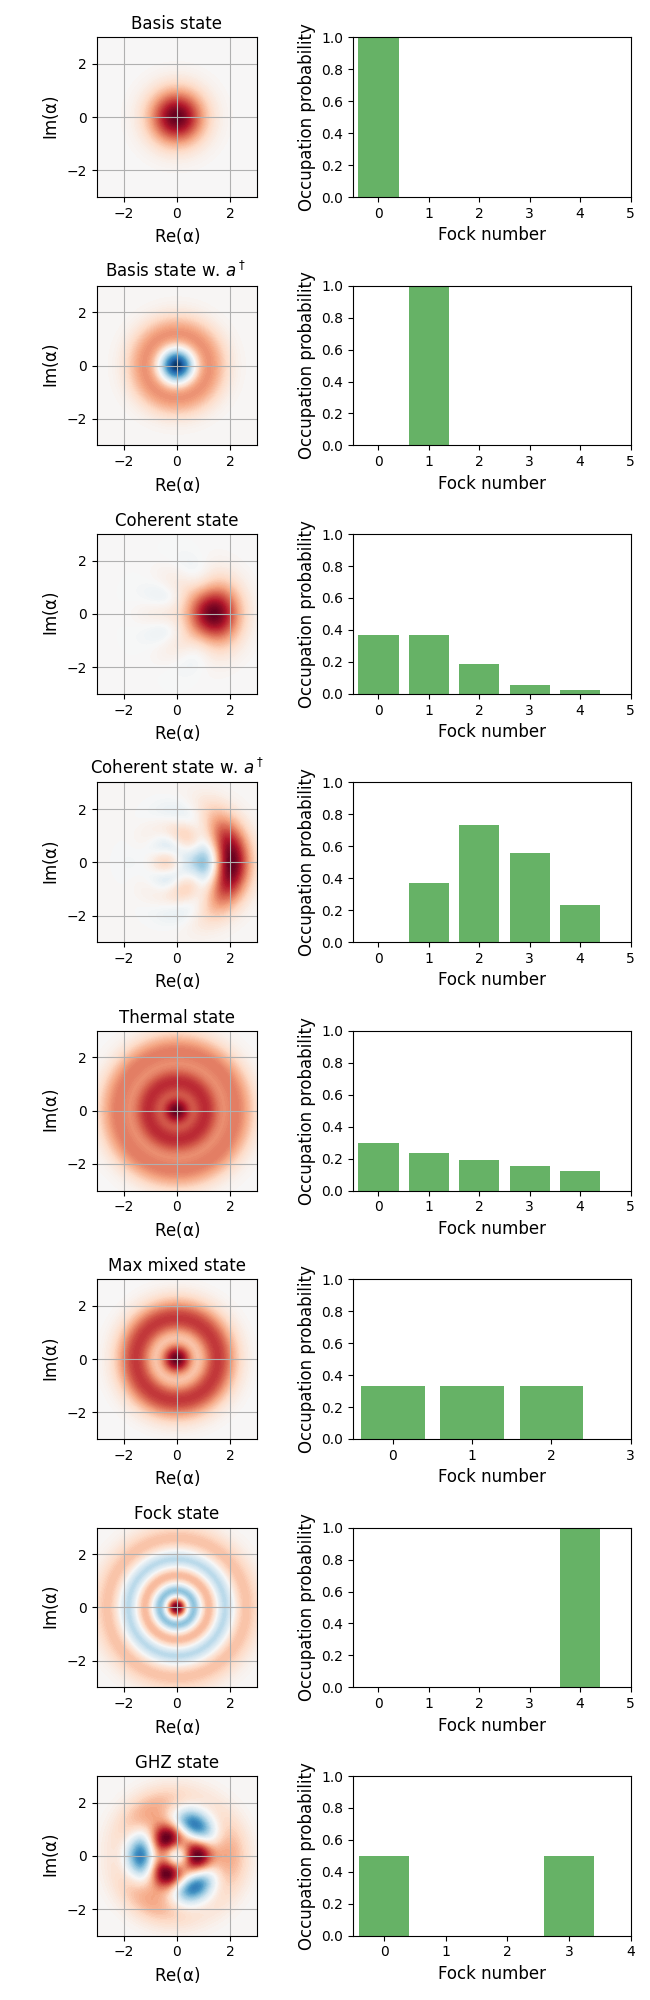

In [5]:
N, n, alpha = 5, 4, 1
a, ad = q.destroy(N), q.create(N)

plt.close()
fig, ((ax0, ax00), (ax01, ax001), (ax1, ax10), (ax11, ax101), (ax2, ax20), (ax3, ax30), (ax4, ax40), (ax5, ax50))  = plt.subplots(8, 2, figsize=(6.5,20))

#plt.subplots_adjust(wspace=.4)

ax0.set_aspect(1); ax0.grid(); ax0.set_title(r"Basis state");       ax0.set_xlim(-3,3); ax0.set_ylim(-3,3)
ax01.set_aspect(1); ax01.grid(); ax01.set_title(r"Basis state w. $a^\dagger$ ");       ax01.set_xlim(-3,3); ax01.set_ylim(-3,3)
ax1.set_aspect(1); ax1.grid(); ax1.set_title(r"Coherent state");    ax1.set_xlim(-3,3); ax1.set_ylim(-3,3)
ax11.set_aspect(1); ax11.grid(); ax11.set_title(r"Coherent state w. $a^\dagger$");    ax11.set_xlim(-3,3); ax11.set_ylim(-3,3)
ax2.set_aspect(1); ax2.grid(); ax2.set_title("Thermal state");     ax2.set_xlim(-3,3); ax2.set_ylim(-3,3)
ax3.set_aspect(1); ax3.grid(); ax3.set_title("Max mixed state");   ax3.set_xlim(-3,3); ax3.set_ylim(-3,3)
ax4.set_aspect(1); ax4.grid(); ax4.set_title("Fock state");        ax4.set_xlim(-3,3); ax4.set_ylim(-3,3)
ax5.set_aspect(1); ax5.grid(); ax5.set_title("GHZ state");         ax5.set_xlim(-3,3); ax5.set_ylim(-3,3)

q.plot_wigner((q.basis(N)).unit(), projection='2d', cmap='RdBu_r',  ax=ax0)
q.plot_fock_distribution(q.basis(N).unit(), ax=ax00)

q.plot_wigner((ad*q.basis(N)).unit(), projection='2d', cmap='RdBu_r',  ax=ax01)
q.plot_fock_distribution(ad*q.basis(N).unit(), ax=ax001)

q.plot_wigner((q.coherent(N, alpha)).unit(), projection='2d', cmap='RdBu_r',  ax=ax1)
q.plot_fock_distribution(q.coherent(N, alpha).unit(), ax=ax10)

q.plot_wigner((ad*q.coherent(N, alpha)).unit(), projection='2d', cmap='RdBu_r',  ax=ax11)
q.plot_fock_distribution(ad*q.coherent(N, alpha).unit(), ax=ax101)

q.plot_wigner((q.thermal_dm(N, n)), projection='2d', cmap='RdBu_r',  ax=ax2)
q.plot_fock_distribution(q.thermal_dm(N, n), ax=ax20)

q.plot_wigner((q.maximally_mixed_dm(n-1)), projection='2d', cmap='RdBu_r',  ax=ax3)
q.plot_fock_distribution(q.maximally_mixed_dm(n-1), ax=ax30)

q.plot_wigner((q.fock_dm(N, N-1)), projection='2d', cmap='RdBu_r',  ax=ax4)
q.plot_fock_distribution(q.fock_dm(N, N-1), ax=ax40)

q.plot_wigner((q.ghz_state(2)), projection='2d', cmap='RdBu_r',  ax=ax5)
q.plot_fock_distribution(q.ghz_state(2), ax=ax50)

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.resizable = False

plt.tight_layout()
plt.show()

In [3]:
def phaseshift(N, theta):
    op = 1j * theta/2 * (q.position(N)**2 + q.momentum(N)**2)
    return q.Qobj(op.expm())

points = np.linspace(-6, 6, 140)

@interact(N=(1,30), r=(-1.,1.), theta=(-np.pi,np.pi), xdisp=(-4.,4.), pdisp=(-4.,4.))
def gaussian(N=20, r=0, theta=0, xdisp=0, pdisp=0):
    plt.close()
    
    s = q.displace(N, (xdisp + pdisp*1j)/np.sqrt(2)) * phaseshift(N, theta) * q.squeeze(N, r) * q.basis(N)
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6.5,3))
    
    plt.subplots_adjust(wspace=.4)
    
    ax0.set_aspect(1)
    ax0.grid()
    
    q.plot_wigner(s, xvec=points, yvec=points, ax=ax0, cmap='RdBu_r')
    q.plot_fock_distribution(s, ax=ax1)

    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.resizable = False

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=20, description='N', max=30, min=1), FloatSlider(value=0.0, description=…